### Introduction and Problem Definition
Customer churn is a critical issue for ConnectTel, as they have been losing customers which is directly impacting their revenue and profitability, posing a significant threat to its business sustainability and growth.

The primary objective of this analysis is to predict customer churn for ConnectTel. By accurately predicting which customers are likely to churn, we can help ConnectTel reduce churn rates as they will be able to:

- Implement targeted retention strategies
- Maintain a stable revenue stream
- Implement effective upselling and cross-selling strategies
- Improve service offerings and overall customer satisfaction.

In [1]:
# Import libraries

# Data Analysis libraries
import pandas as pd
import numpy as np

# Data Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
# !pip install imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Classifier libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC

#Grid Search
from sklearn.model_selection import GridSearchCV

# Evaluation libraries
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Ignore Warning
import warnings
warnings.filterwarnings('ignore')


### Load, Examine and Clean Dataset

In [2]:
# Load the dataset
df = pd.read_csv('Customer-Churn.csv')

In [3]:
# Check first five rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Check last five rows of the dataset
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
# Check data dimension
df.shape

(7043, 21)

In [6]:
# Check data columns and type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Observation
- The data has 7043 entries/rows and 21 columns
- The data type of TotalCharges column is wrongly casted as an obect and should be float 
- The number of non-null values tally total number of entries, indicating no null values in dataset
- Column names appear correct

In [7]:
# Columns in the dataset
cols= df.columns
cols

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
# Checking for empty strings in the dataset
for col in cols:
    print (col)
    print(len(df[df[col] == ' ']))
    print('*' * 40)

customerID
0
****************************************
gender
0
****************************************
SeniorCitizen
0
****************************************
Partner
0
****************************************
Dependents
0
****************************************
tenure
0
****************************************
PhoneService
0
****************************************
MultipleLines
0
****************************************
InternetService
0
****************************************
OnlineSecurity
0
****************************************
OnlineBackup
0
****************************************
DeviceProtection
0
****************************************
TechSupport
0
****************************************
StreamingTV
0
****************************************
StreamingMovies
0
****************************************
Contract
0
****************************************
PaperlessBilling
0
****************************************
PaymentMethod
0
****************************************


In [9]:
# Define a function to convert the empty strings to null values and convert data type of the TotalCharges column to float
def convert_to_float(df, col):
    """
    The function converts the specified column in the specified dataframe to numeric values, replacing non-numeric values with 
    NaN. It returns the dataframe with the specified column converted to numeric values, thereby changing its datatype.
    
    """
    # Convert the column to numeric and replace non-numeric values with NaN 
    df[col] = pd.to_numeric(df[col], errors='coerce')
   
    return df
    
    
# Apply the function to the column
df = convert_to_float(df, 'TotalCharges')


In [10]:
# Sanity check
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
# Checking for missing values
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Observations
- The missing values is a result of the conversion of non numeric values such as empty strings in the columns

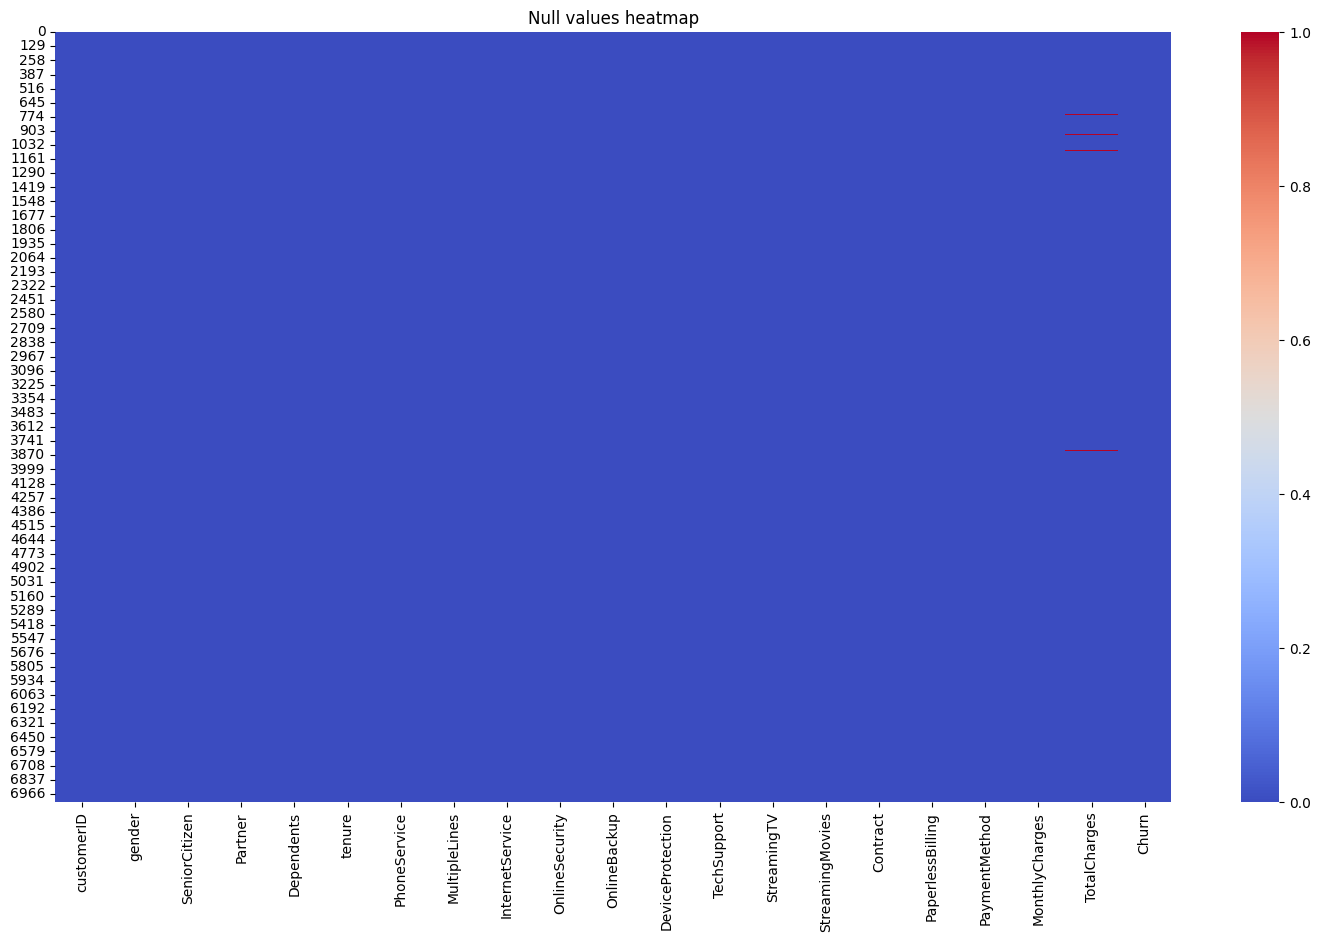

In [12]:
# Visualise missing values
plt.figure(figsize = (18, 10))
sns.heatmap(df.isna(), cmap = 'coolwarm').set(title= 'Null values heatmap');

In [13]:
# View the null values in the dataset
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


#### Observations
- There are 11 missing values
- All the null values have No as churned customer

#### Recommendation
- Fill null values with the median of customers not churned

In [14]:
# Calculate the median of TotalCharges where Churn is 'No'
median_value = df.loc[df['Churn'] == 'No', 'TotalCharges'].median()

# Fill NaN values in TotalCharges with the median value where Churn is 'No'
df['TotalCharges'] = df['TotalCharges'].fillna(median_value)

In [15]:
# Sanity check
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
# Check for duplicates in the dataset
df.duplicated().sum()

0

In [17]:
# Check data statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2282.363808
std,0.368612,24.559481,30.090047,2265.124074
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
# Check statistical distribution of the categorical columns
df.describe(include = 'object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


### Exploratory Data Analysis
#### Univariate Analysis

In [19]:
# Define a custom color palette 
#custom_palette = ['#c33609', '#811e5a', '#f7cdb1', '#ce1d4e']
#custom_palette = ['#91522f', '#d4bca4', '#222d50', '#f0bc73']
#c33609 #531e4d ['#f16545', '#811e5a', '#f7cdb1', '#ce1d4e']
#red orange
custom_palette = ['#3b4cc0', '#b40426', '#e57058', '#808080']

# Set the custom palette for plots
sns.set_palette(custom_palette)

In [20]:
# Explore uniques values in each column where nunique is less than 5
for col in cols:
    print (col)
    num_unique = df[col].nunique()
    print (num_unique)
    if num_unique < 5:
        print(df[col].unique())
    print('*' * 40)

customerID
7043
****************************************
gender
2
['Female' 'Male']
****************************************
SeniorCitizen
2
[0 1]
****************************************
Partner
2
['Yes' 'No']
****************************************
Dependents
2
['No' 'Yes']
****************************************
tenure
73
****************************************
PhoneService
2
['No' 'Yes']
****************************************
MultipleLines
3
['No phone service' 'No' 'Yes']
****************************************
InternetService
3
['DSL' 'Fiber optic' 'No']
****************************************
OnlineSecurity
3
['No' 'Yes' 'No internet service']
****************************************
OnlineBackup
3
['Yes' 'No' 'No internet service']
****************************************
DeviceProtection
3
['No' 'Yes' 'No internet service']
****************************************
TechSupport
3
['No' 'Yes' 'No internet service']
****************************************
StreamingTV
3
['N

In [21]:
# Define a function to rename the values in SeniorCitizen for visualisation as it is categorical
def rename(col):
    """
    This function renames the given values in the specified column to 'Yes' if the input is 1 or 'No' if the input is 0.
    
    """
    if col == 1:
        return 'Yes'
    else:
        return 'No'

# Apply the rename function
df['SeniorCitizen'] = df['SeniorCitizen'].apply(rename)

In [22]:
# Sanity check
df.SeniorCitizen.unique()

array(['No', 'Yes'], dtype=object)

In [23]:
# Rename the values in PaymentMethod to improve readability in plots
df['PaymentMethod'] = df['PaymentMethod'].replace({'Bank transfer (automatic)': 'Bank transfer', 'Credit card (automatic)': 'Credit card'})

In [24]:
# Sanity check
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [25]:
# Define a function to group the tenure
def tenure_range(tenure):
    """
    The function categorizes the tenure into ranges: Short_term, Mid_term, and Long_term and returns the categories.
    
    """
    if tenure <= 25:
        return '<26 Short_term'
    elif tenure <= 50:
        return '26 - 50 Mid_term'
    else:
        return '50+ Long_term'
    

#apply the function to dataset
df['tenure_range'] = df['tenure'].apply(tenure_range)

In [26]:
# Sanity check
df.tenure_range.unique()

array(['<26 Short_term', '26 - 50 Mid_term', '50+ Long_term'],
      dtype=object)

In [27]:
# Select the numerical columns
num_cols = df.select_dtypes(include = ['number']).columns
num_cols

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

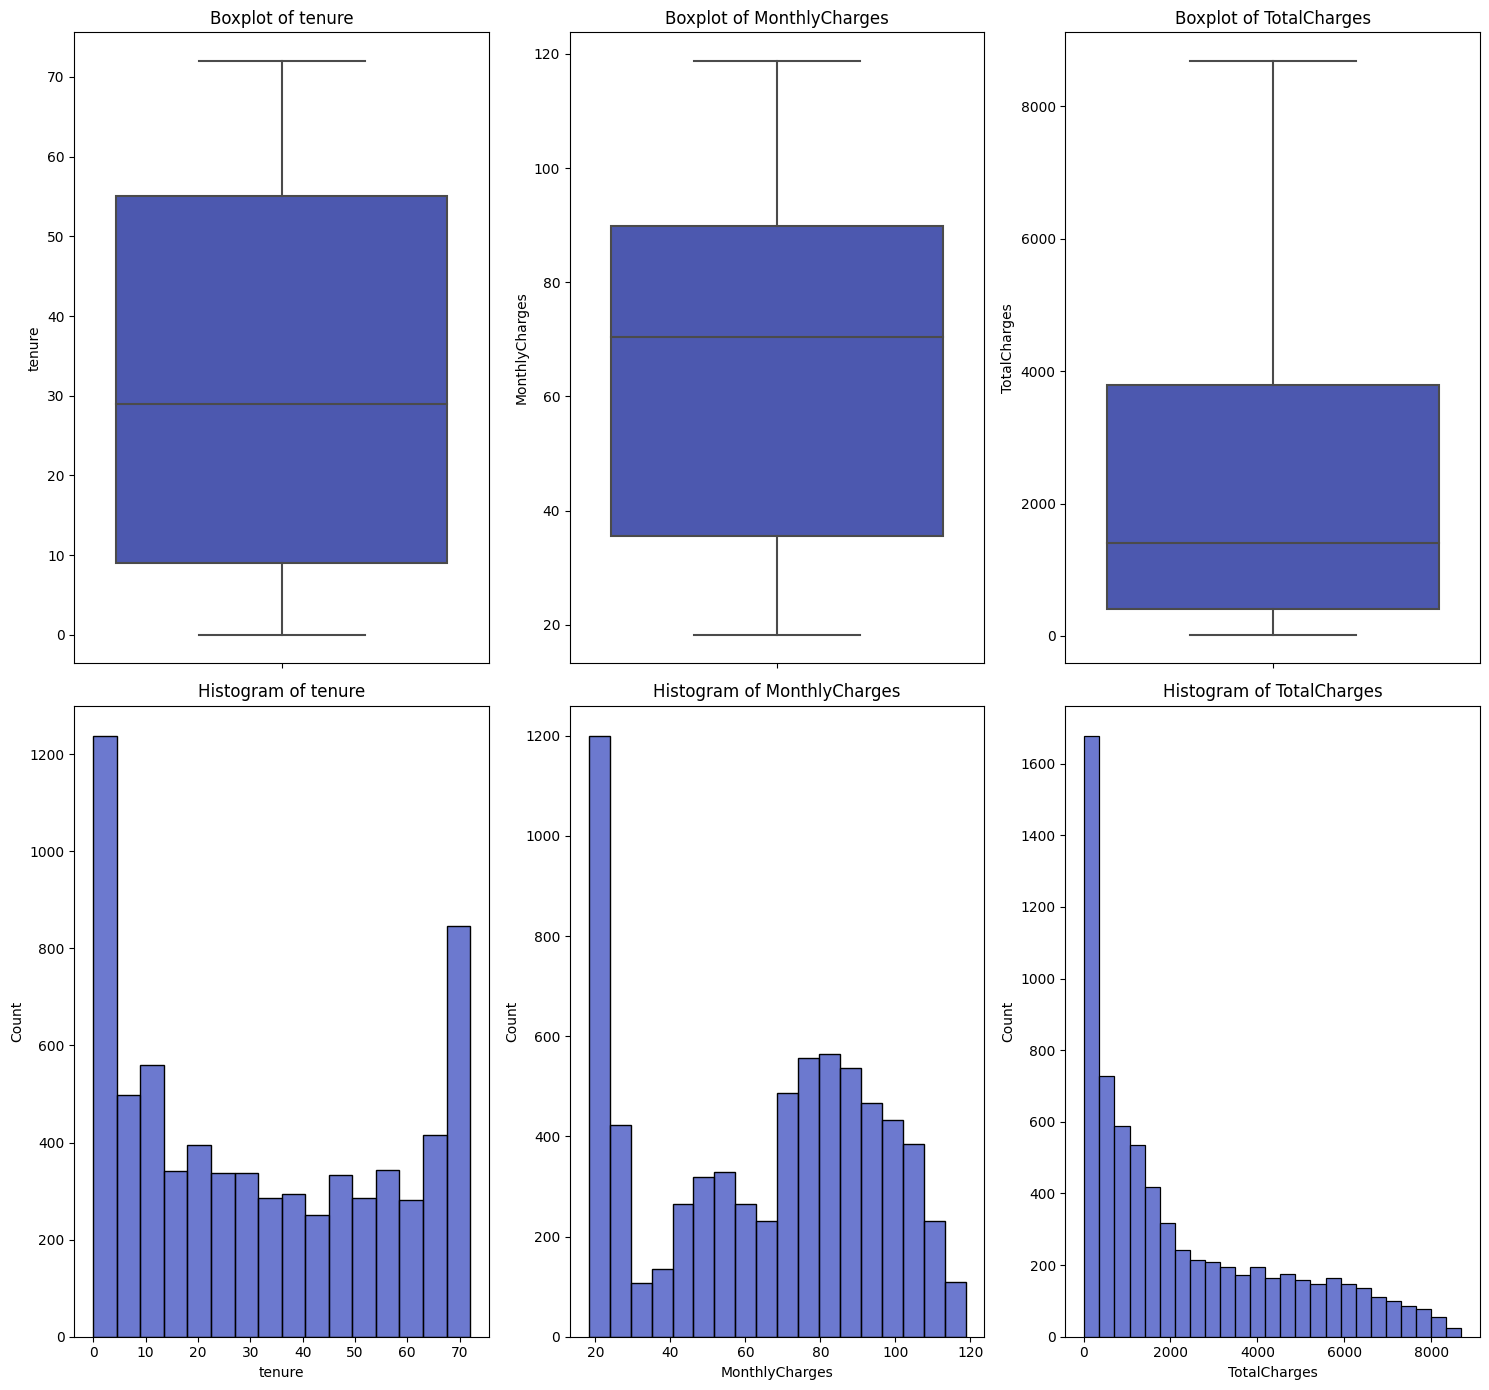

In [28]:
# Create a figure with 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(15, 14))

# Plot boxplots on the first row and check for outliers
for i, col in enumerate(num_cols):
    sns.boxplot(y=col, data=df, ax=axs[0, i])
    axs[0, i].set_title(f'Boxplot of {col}')

# Plot histograms on the second row to check distribution
for i, col in enumerate(num_cols):
    sns.histplot(x=col, data=df, ax=axs[1, i])
    axs[1, i].set_title(f'Histogram of {col}')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

####  Observations
- The IQR of the Tenure column ranges between 10 and 55 with a median of about 29  and a somewhat stable, distribution in the histogram plot with high frequencies on both ends. 
- The IQR for monthly charges column ranges between 36 and 90 with a median of about 70 and a somewhat normal distribution with high datapoints on the lower end. 
- The IGR of the Total charges ranges between 400 to 3800 and a low median of about 1400 with a long of data points further from the median which indicates a high variability in the total charges paid by customers. The distribution is also skewed to the right indicating a higher mean than median/mode and a concentration of majority of the data points to the left side.

In [29]:
# Select the categorical columns
cat_cols = df.select_dtypes(include = ['object']).columns

# Exclude 'customerID'
cat_cols = [col for col in cat_cols if col != 'customerID']

print(cat_cols)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'tenure_range']


In [30]:
# Calculate percentages
total = len(df)
values = df['Churn'].value_counts().values
perc = [f'{(v/total) * 100:.1f}%' for v in values]

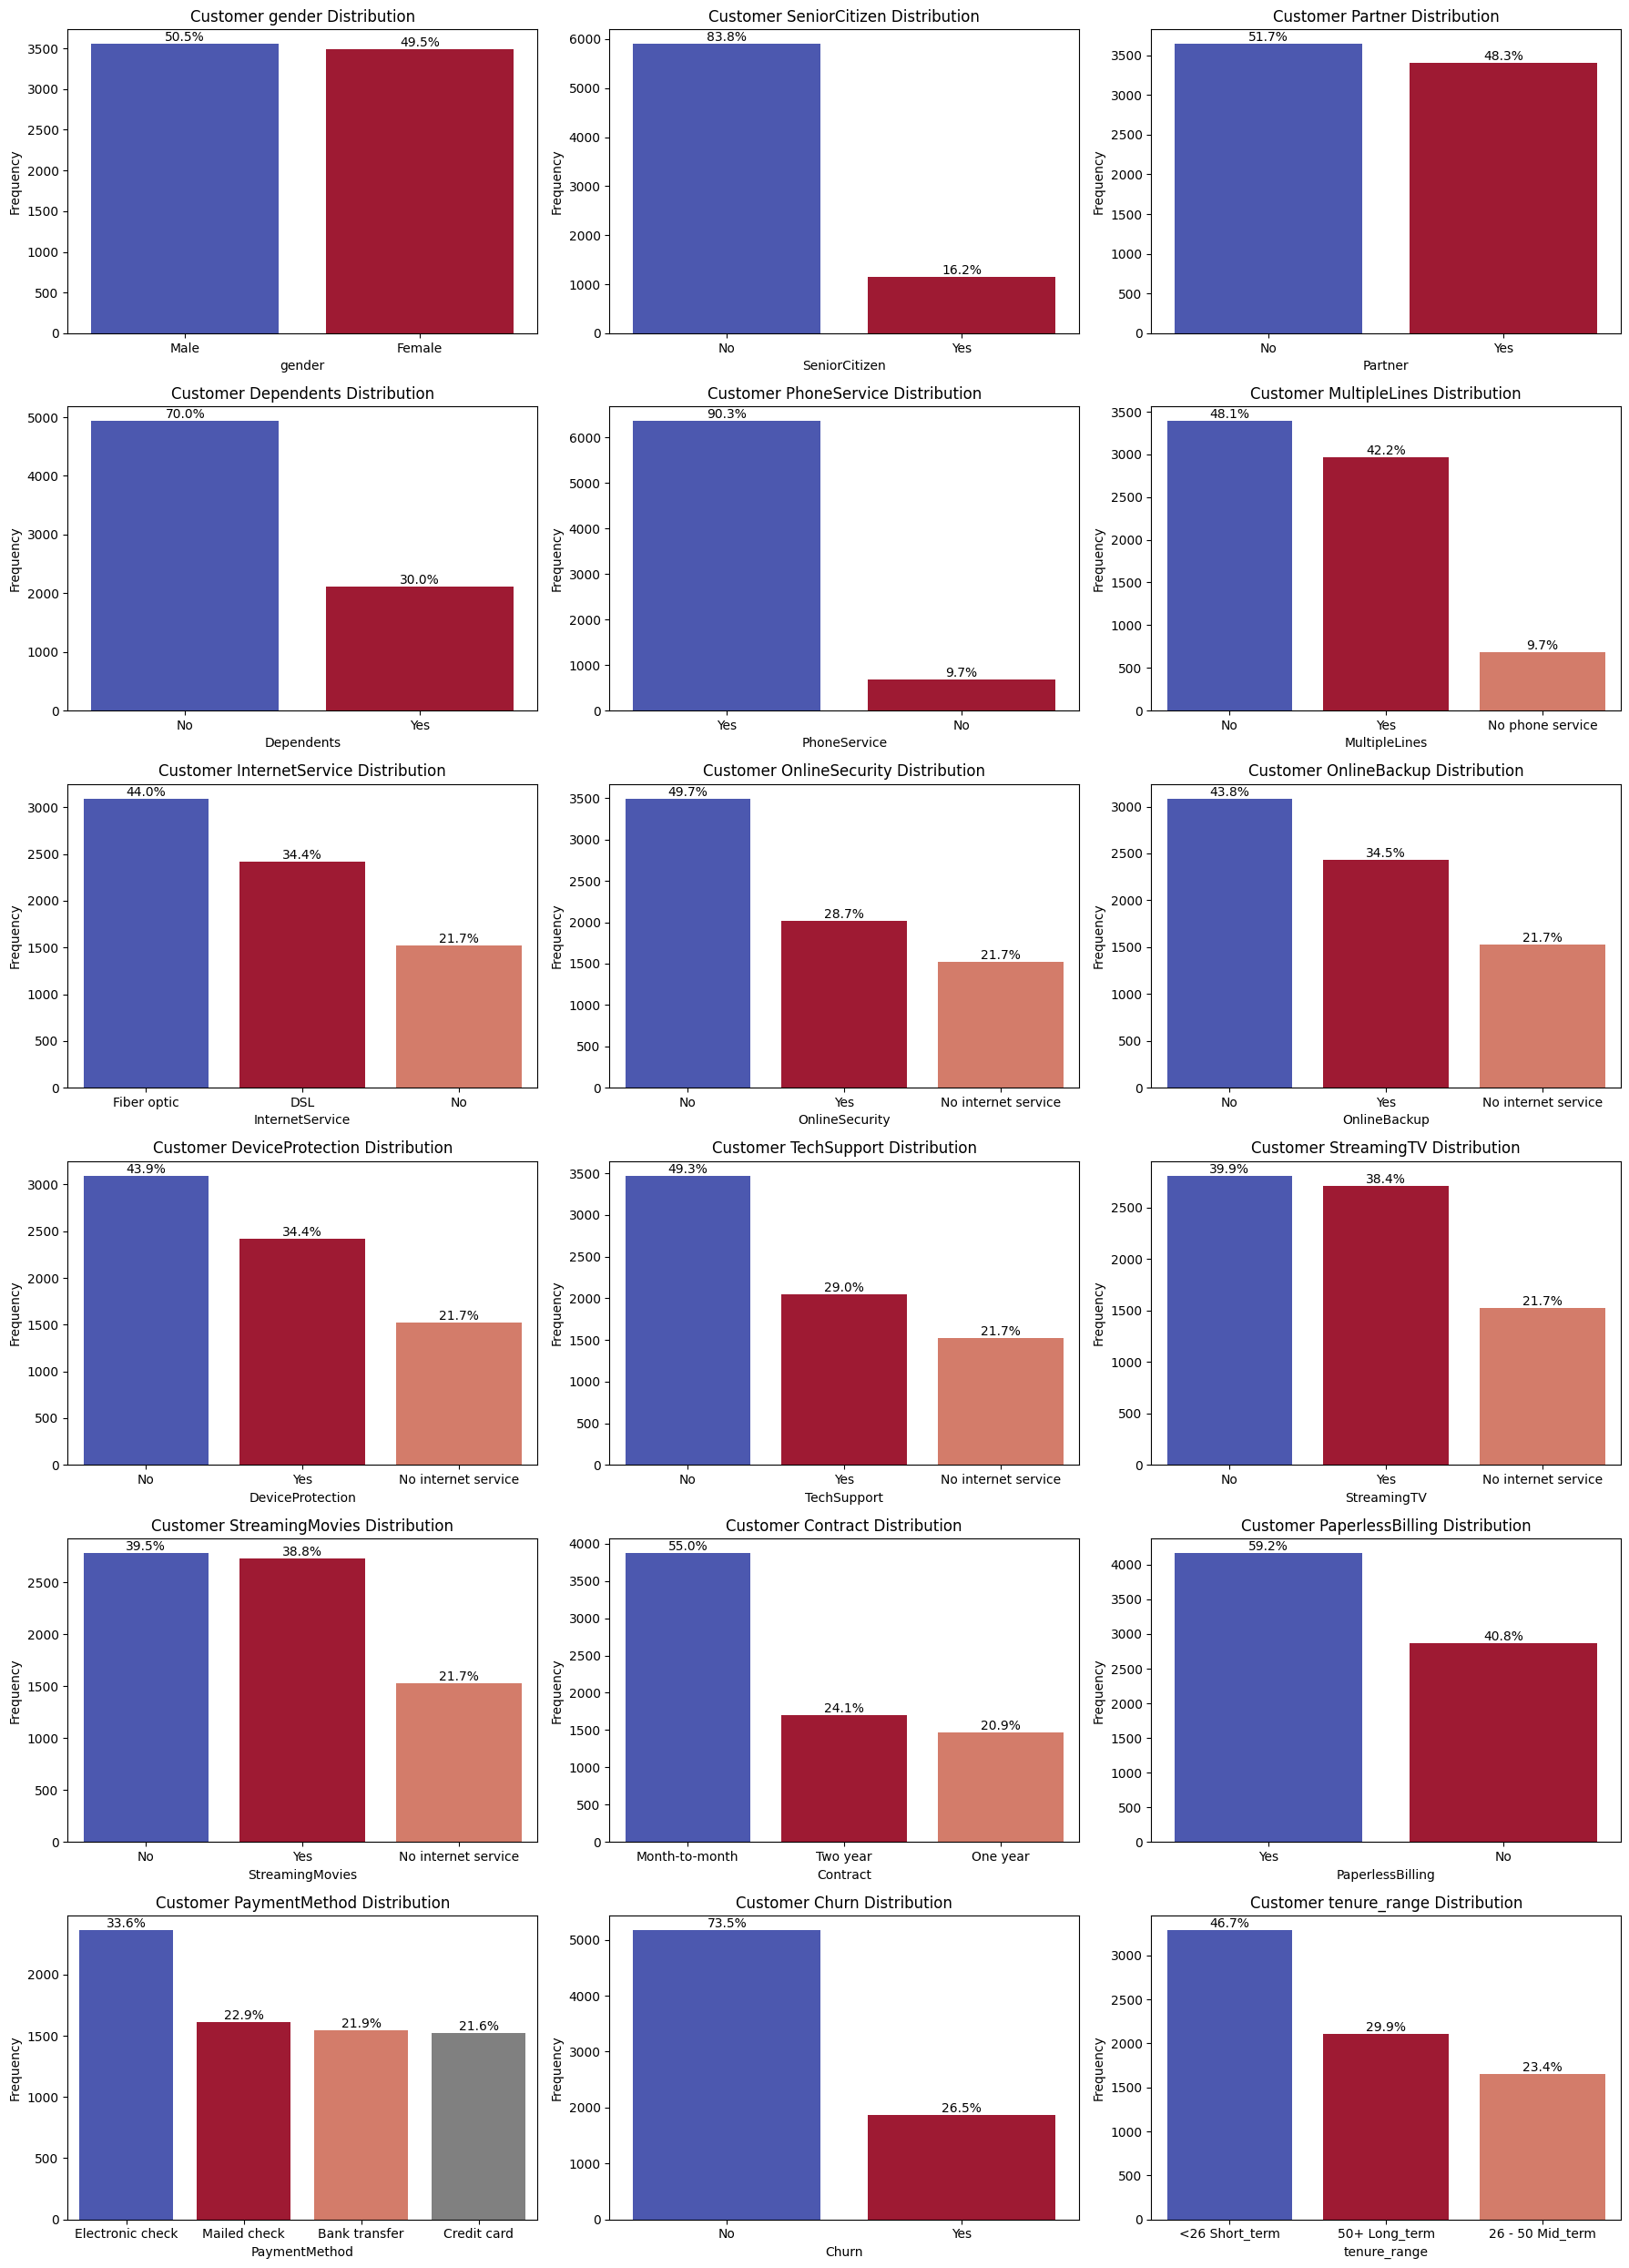

In [31]:
# Visualising the categorical columns
fig, axs= plt.subplots(6, 3, figsize = (18,25))
axs = axs.flatten()
total = len(df)
for i, col in enumerate (cat_cols):
    ax = sns.countplot(x = col, data = df, ax = axs[i], order = df[col].value_counts().index)
    values = df[col].value_counts().values
    perc = [f'{(v/total) * 100:.1f}%' for v in values]
    ax.bar_label(container = ax.containers[0], labels = perc)
    ax.set_title(f'Customer {col} Distribution')
    ax.set_ylabel('Frequency')
plt.tight_layout()

#### Observations
- Around 84% of ConnectTel customers are younger citizens.
- Only about 30% of ConnectTel customers have dependants.
- Most customers have phone service, with approximately 42% having multiple lines and about 79% subscribed to some form of internet service.
- Online security, online backup, device protection, and tech support services are subscribed to by only around 30-35% of customers.
- About 38% of customers subscribe to both Streaming TV and Streaming movie services.
- A significant majority of customers, 59%, opt for paperless billing.
- 33%  of customers pay with electronic checks while other payment methods are evenly distributed.
- Month-to-month contracts are favored by 55% of customers, compared to 24% on 2-year contracts and 22% on 1-year contracts.
- Nearly half of ConnectTel customers, 47%, have been with the company for 25 months or less, while 30% have been customers for 50 months or more, and 23% for 26 to 50 months.
- Churn rate among ConnectTel customers stands at 27%.

#### Bivariate Analysis

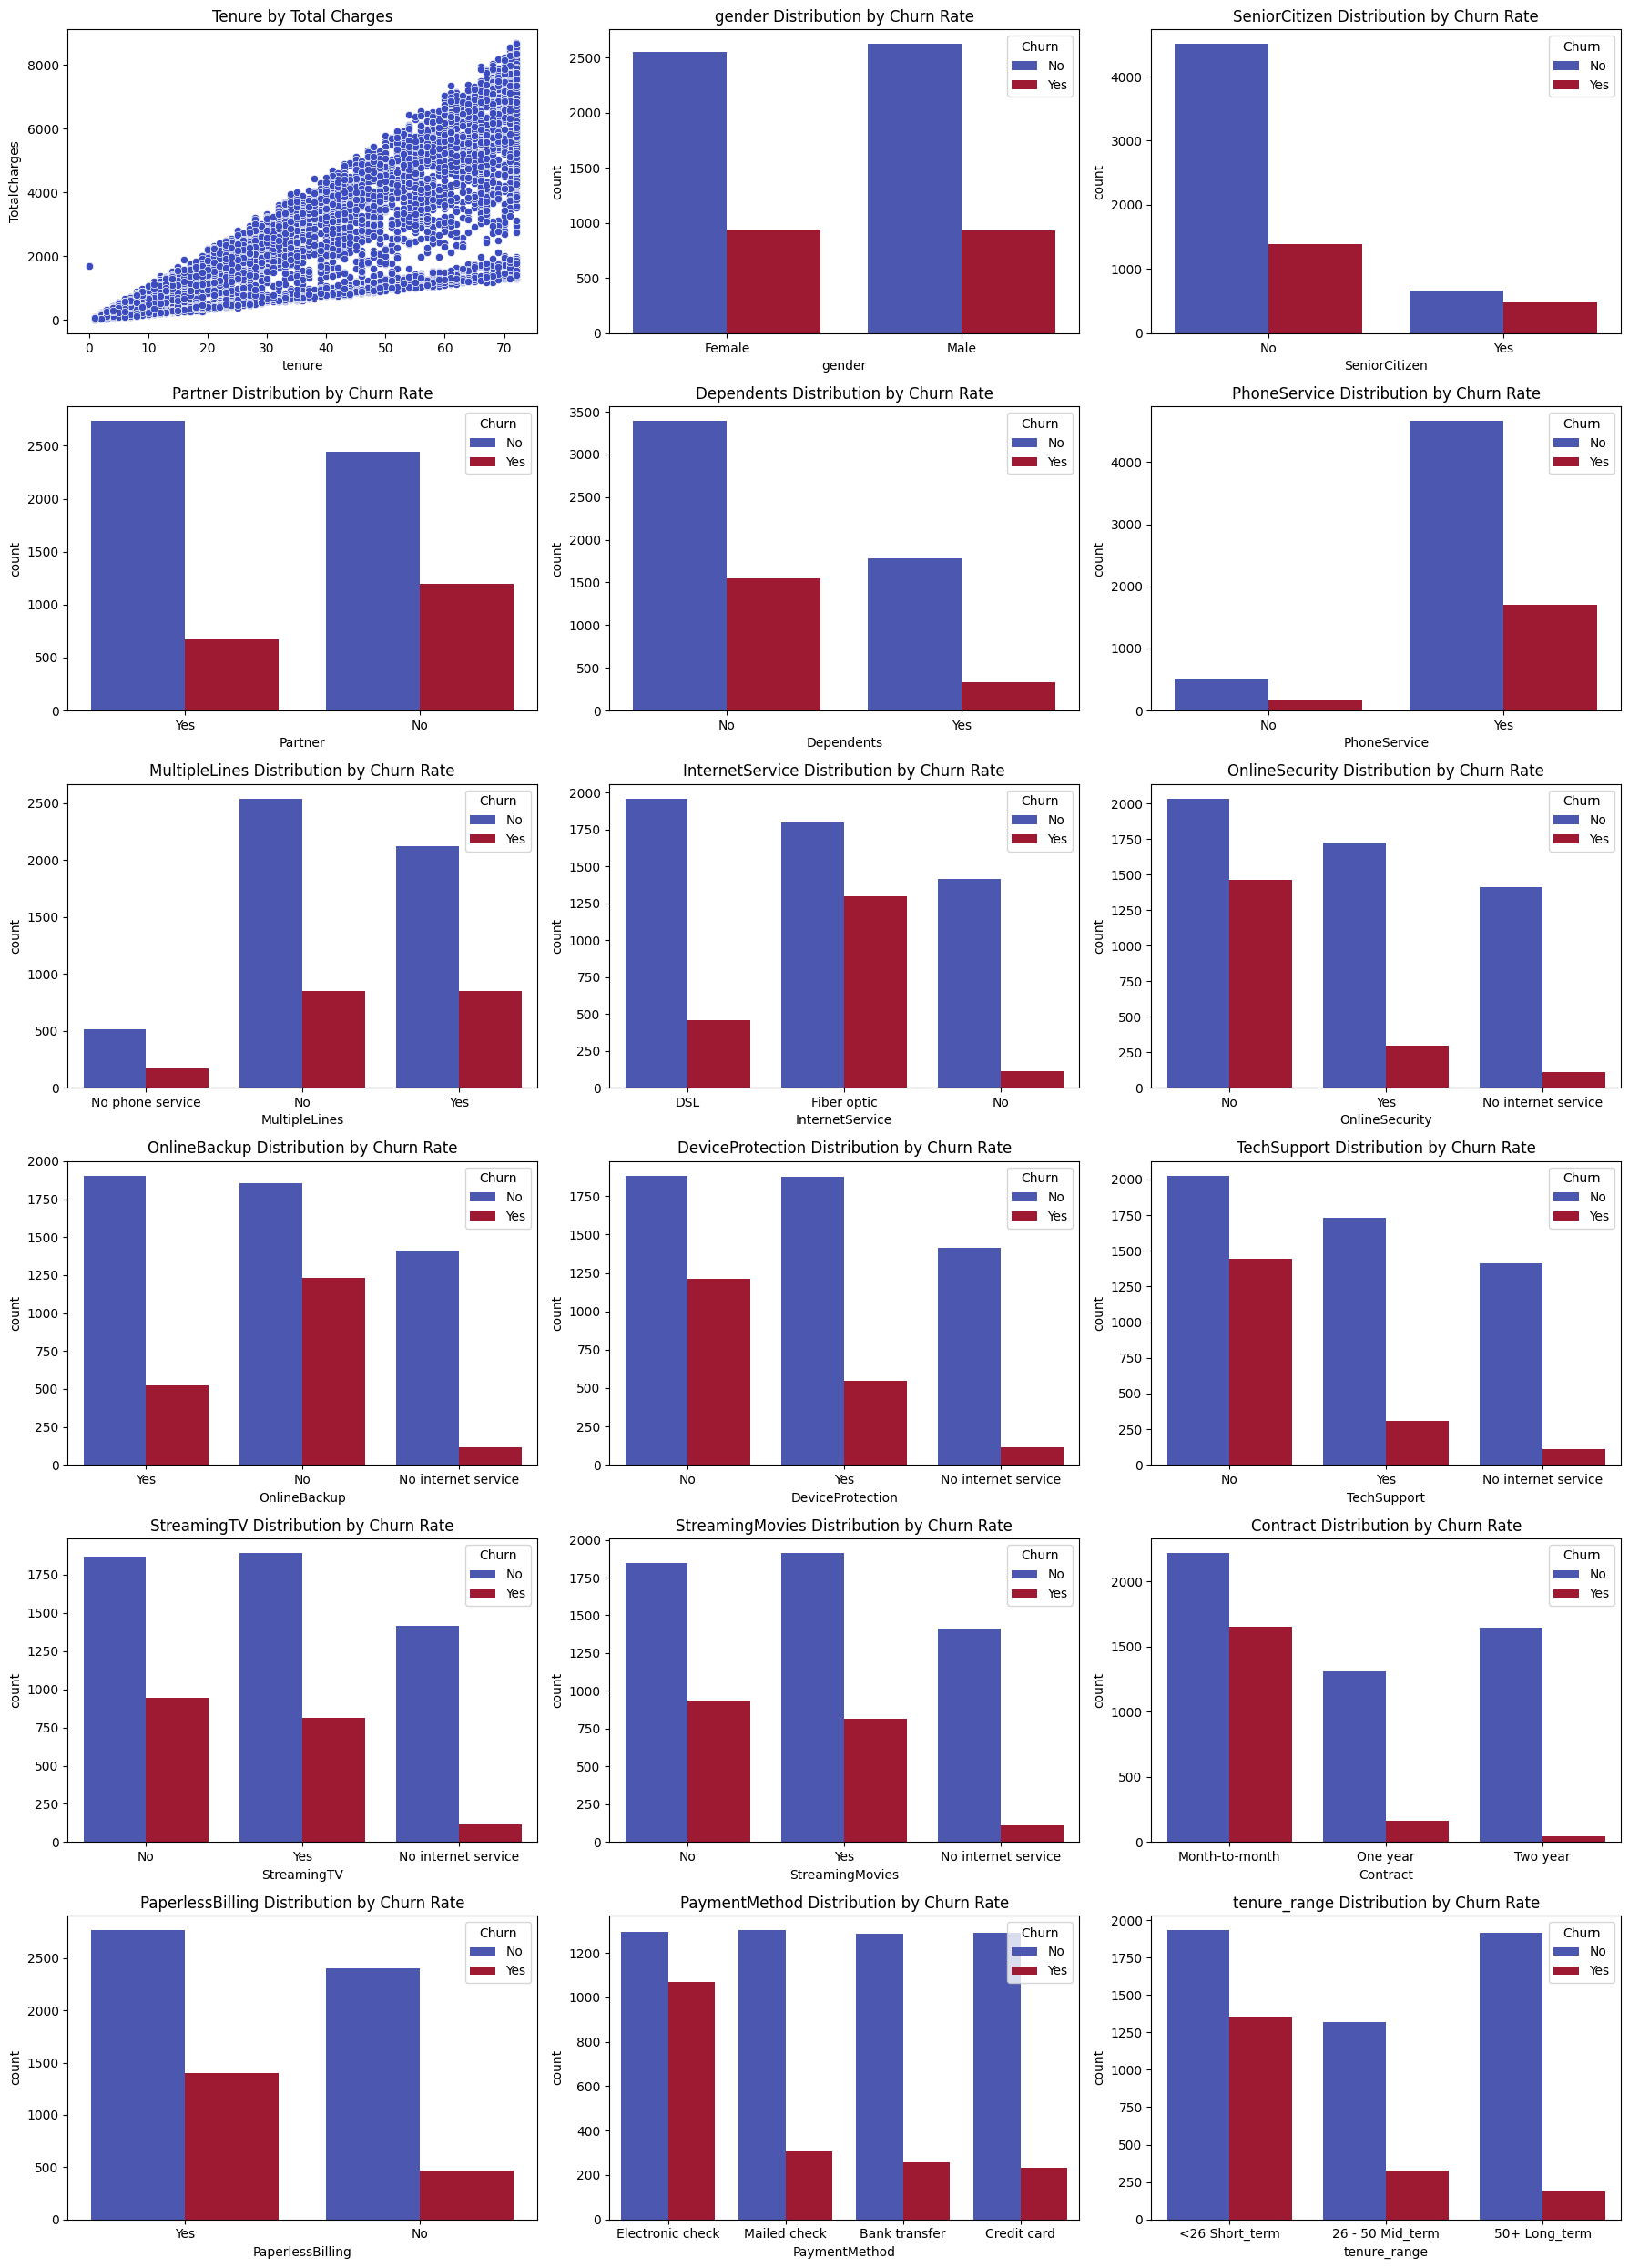

In [32]:
# Frequency of categorical columns against churn rate
fig, axs = plt.subplots(6,3, figsize = (18,25))
axs = axs.flatten()
plot_index = 1
for i, col in enumerate (cat_cols):
    if col != cat_cols[16]:
        sns.countplot(data = df, x = col, ax = axs[plot_index], hue = 'Churn').set(title = f'{col} Distribution by Churn Rate')
        plot_index += 1  # Increment subplot index only when a plot is created
        
sns.scatterplot(x = 'tenure', y = 'TotalCharges', data = df, ax = axs[0]).set(title = 'Tenure by Total Charges');   
plt.tight_layout()

#### Observations

- **Tenure and Total Charges:** The scatter plot shows a positive correlation, meaning that as tenure increases, total charges also tend to increase. However, there's a noticeable outlier where a customer with a short tenure has relatively high total charges, possibly indicating high initial spending as a new customer.

- **Gender Distribution and Churn Rate:** The plot shows a similar rate of churn between male and female customers. More customers in both genders did not churn compared to those who did, suggesting other factors might be more important in predicting churn.

- **Senior Citizen Distribution and Churn Rate:** Younger citizens have a higher churn rate compared to senior citizens, but most senior citizens have churned. Targeted marketing strategies may help ConnectTel retain their senior customers.

- **Partnership/Dependants Status and Churn Rate:** Approximately 50% of customers without partners have churned, with their churn rate significantly higher than that of customers with partners. Similarly, nearly half of customers without dependants have churned, which is more than double the churn rate of customers with dependants.

- **Phone Service and Churn Rate:** Churn rate is higher among customers with phone service. However, the churn rate for customers with and without multiple phone lines is fairly similar.

- **Internet Service and Churn Rate:** Customers with Fibre optic internet service have the highest churn rate, with 70% having churned. This may indicate issues with this service, suggesting a need to review and possibly migrate the few remaining customers to other internet services to retain them.

- **Additional Services and Churn Rate:** Customers without online security, online backup, device protection, and tech support services have the highest churn rates. Incentivizing these customers to subscribe to these services could improve retention.

- **Streaming Services and Churn Rate:** Customers with and without Streaming TV and Streaming movies services have a fairly similar churn rate, indicating that other factors may be more important in determining churn.

- **Contract Type and Churn Rate:** Approximately 85% of all churned customers are on month-to-month contracts, suggesting that customers on more flexible contracts are at higher risk of churning. Addressing their needs and providing compelling reasons to stay can help reduce churn and improve retention.

- **Billing and Payment Methods:** Customers on paperless billing have a higher churn rate. Similarly, customers who pay through electronic check record an alarming churn rate compared to other payment methods. Reviewing these billing and payment channels may help reduce churn.

- **Tenure and Churn Rate:** Churn rate is higher among customers with a short tenure of 25 months or less. This suggests that newer customers are more likely to churn, ConnectTel needs to employ strategies to retain customer longer than 25 months to reduce their risk of churning.

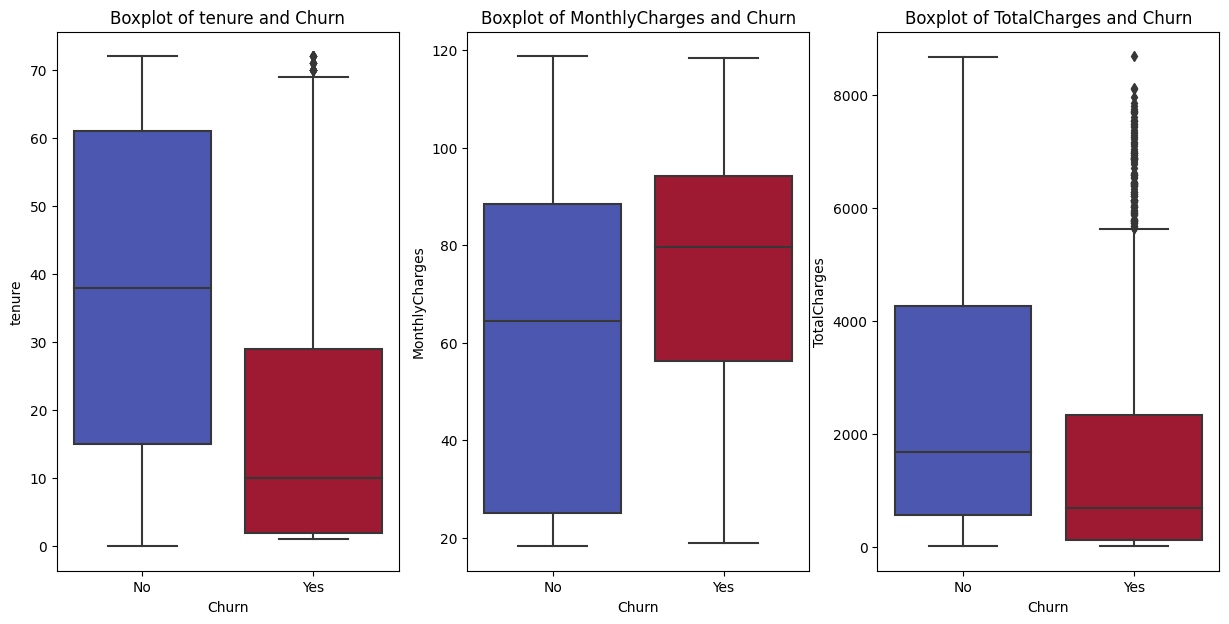

In [33]:
fig, axs= plt.subplots(1, 3, figsize = (15,7))
for i, col in enumerate(num_cols):
    sns.boxplot(x = 'Churn', y =col, data = df, ax = axs[i])
    axs[i].set_title(f'Boxplot of {col} and Churn')

#### Observations
- **Boxplot of Tenure and Churn Rate:** We see a higher variability in the tenure of Non-churned customers with IQR ranging between 15 to 62 months and a median around 39 months while the median tenure for churned customer is significantly lower at about 10 months and a smaller IQR ranging between 1 to about 28 months. There is however significant variability with whiskers extending to about 68 months and a few outliers above this range. Customers who churn tend to have shorter tenures compared to those who stay. This suggests that customer tenure is an important factor in predicting churn.


- **Boxplot of Monthly Charges and Churn Rate:** The median monthly charges of non-churned customers are around GBP64, with IQR spanning from approximately GBP30 to GBP90 and the upper limit extending to around GBP120. Churned customers on the other hand have higher median monthly charges at around GBP80 and IQR spaning from about GBP60 to GBP95. The higher median monthly charges for churned customers indicates that higher monthly charges may be a factor contributing to customer churn.

- **Boxplot of Total Charges and Churn Rate:** The median total charges of non-churned customers are around GBP2,000, with IQR spanning from approximately GBP1,000 to GBP4,000 and upper limit extending well above GBP 8,000. In comparison, Churned customers have a lower median of total charges just below GBP 1,000, with IQR spaning from about GBP200 to GBP2,500 and upper limits up to approximately GBP6,000 with several outliers above this limit.

#### Multivariate Analysis

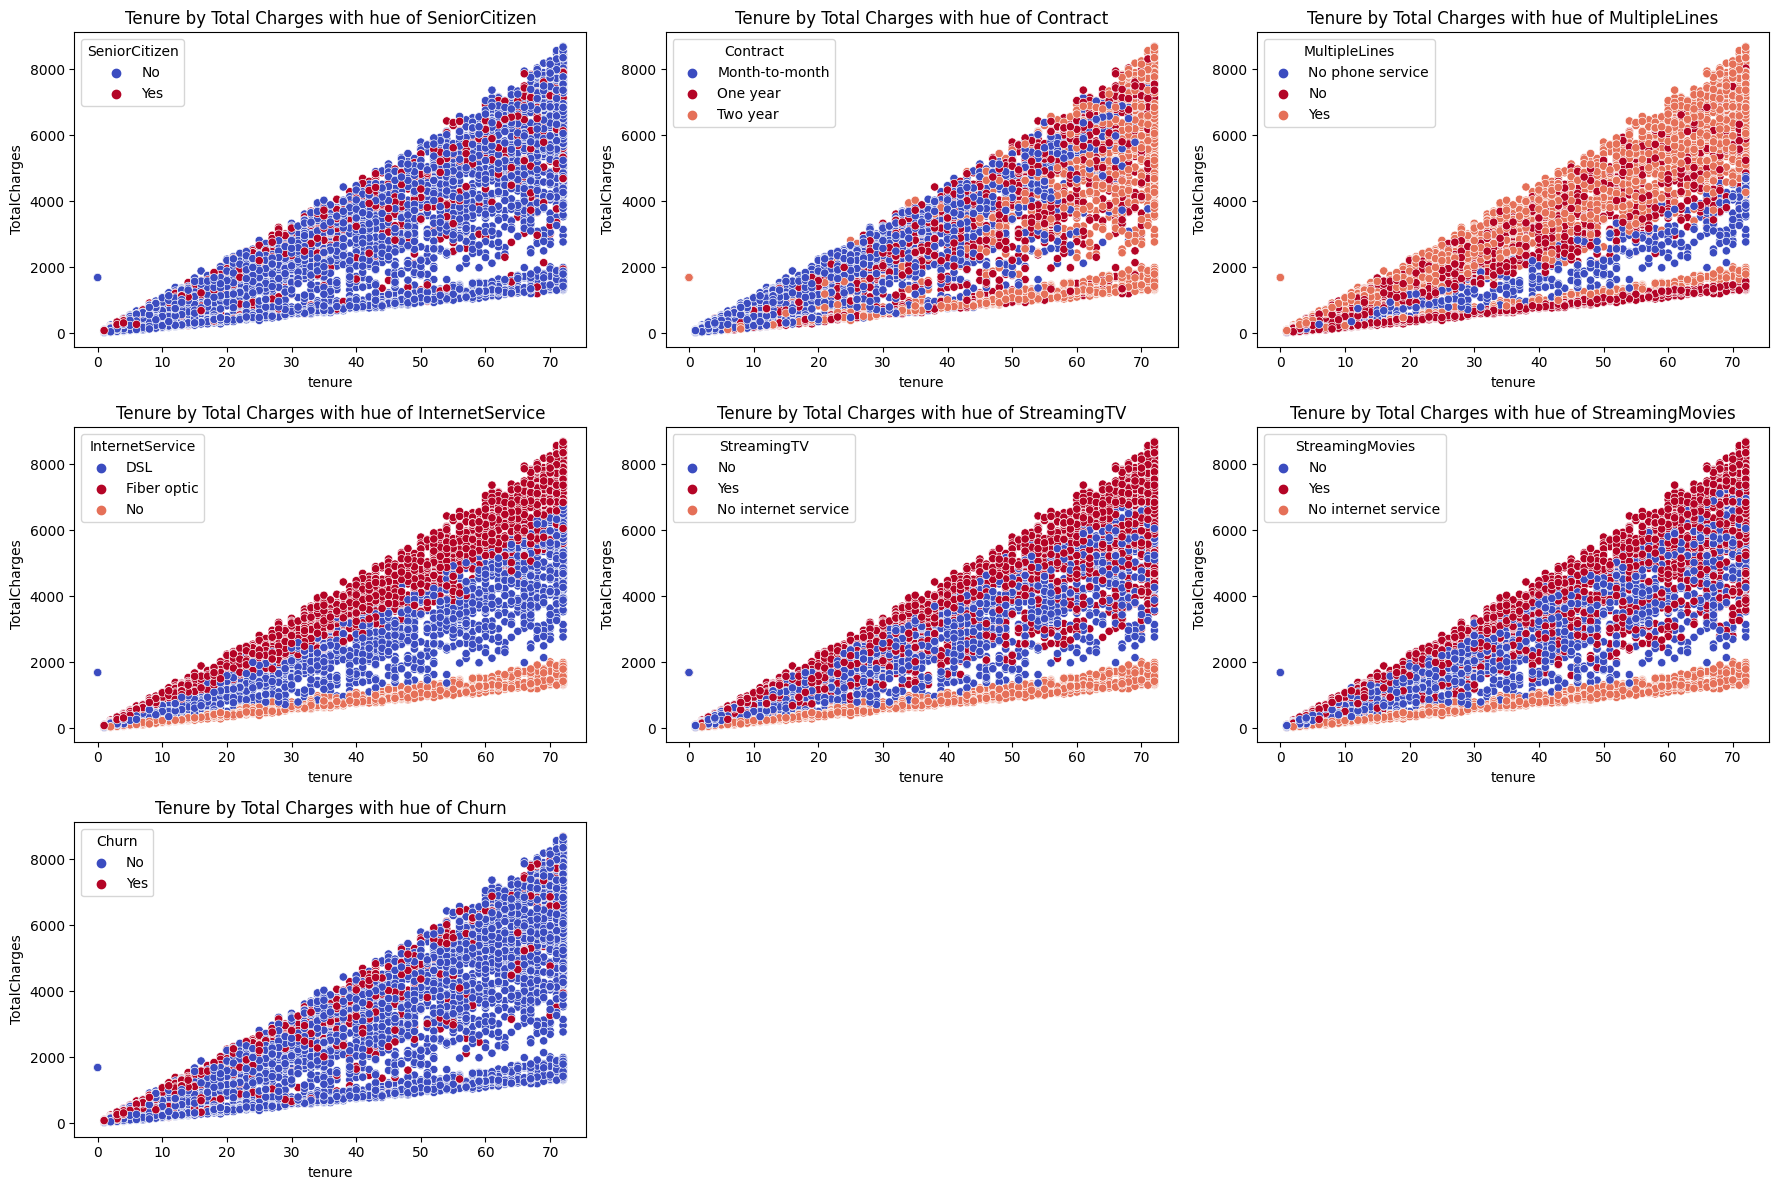

In [34]:
# Visualising interesting columns with more details
int_col = ['SeniorCitizen', 'Contract', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies', 'Churn']

# Scatterplot of TotalCharges and Tenure with a hue of the listed columns
fig, axs = plt.subplots(3,3, figsize = (18,12))
axs = axs.flatten()
for i, col in enumerate (int_col):
    sns.scatterplot(x = 'tenure', y = 'TotalCharges', data = df, ax = axs[i], hue = col).set(title = f'Tenure by Total Charges with hue of {col}');   
plt.tight_layout()

for ax in axs[len(int_col):]: #using for loop to select sub plots after the length of list to be plotted
    fig.delaxes(ax) #delete empty, subplot


#### Observations
Due to the strong positive correlation seen in the scatterplot between tenure and total charges, some interesting columns were added as hue to glean more information.
- **Senior Citizen Hue:** Except for a few data points, senior citizens are more likely to remain with ConnectTel for longer than 20 months. Therefore, employing strategies to retain senior citizens may be beneficial for the company.
- **Contract Hue:** The highest-paying, long-tenure customers are on two-year contracts. We also see that the longer the short- to medium-tenure customers stay with ConnectTel, the higher the total revenue to ConnectTel. Thus, it will be beneficial to incentivize customers to migrate to annual contracts.
- **Multiple Lines Hue:** Most of ConnectTel's revenue is generated from customers with multiple lines, so employing strategies to retain customers with multiple lines is very important.
- **Internet Service Hue:** Customers on the fiber-optic service pay the highest total charges. Although this may generate high revenues for ConnectTel, it is worth reviewing if the high cost is responsible for the high churn rates in this service. A downward review of rates or providing commensurate value-for-money service may help mitigate churn among customers on this service.
- **Streaming Services Hue:** Streaming services drive significant revenues for ConnectTel, so it may be beneficial to develop targeted marketing strategies to encourage customers to sign up for these services.
- **Churn Rate Hue:** A significant portion of churned customers pay high total charges. It may be necessary to conduct a competitive pricing review to ensure ConnectTel's pricing is competitive.


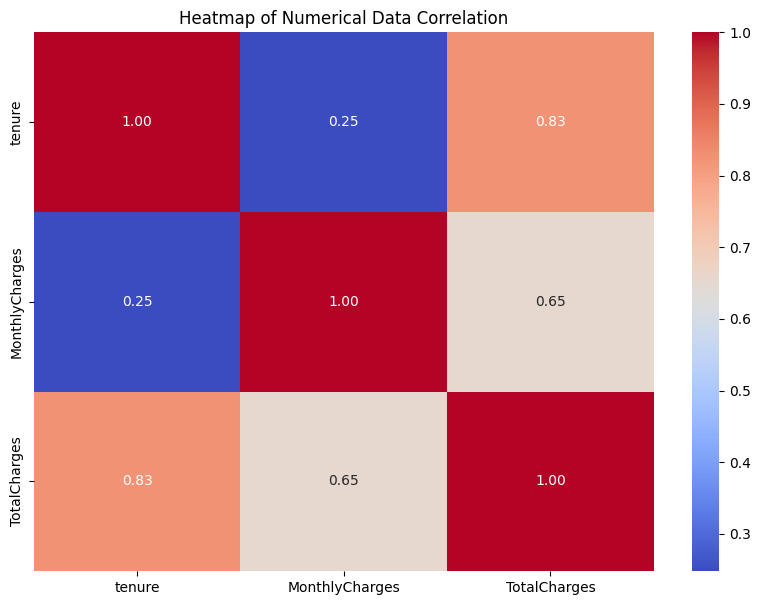

In [35]:
# Visualising correlation in the dataset
df_corr = df.corr(numeric_only= True)
plt.figure(figsize = (10,7))
sns.heatmap(df_corr, annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.title('Heatmap of Numerical Data Correlation');

#### Observations
- Consistent with the scatterplot, the correlation heatmap shows 83% posive correlation between tenure and total charges.
- There is a 65% positive correlation between monthly charges and total charges. However, this may indicate multicollinearity since monthly charges contribute directly to total charges.
- Monthly charges have a weak positive correlation with tenure at 25%.
- The pairplot below further supports these observations, clearly illustrating the relationships between tenure, total charges, and monthly charges.

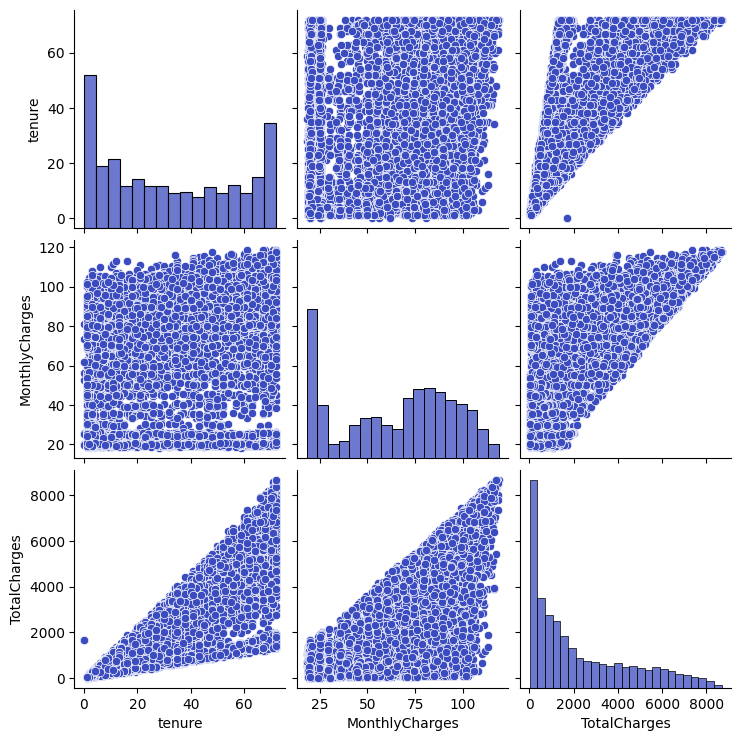

In [36]:
# Visualising the dataset using pairplot
sns.pairplot(data =df);

### Data Preprocessing

In [37]:
# Encode the data in the categorical columns

# Instantiate the labelencoder object
le = LabelEncoder()

# Encode the labels using the cat_cols list
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [38]:
# Sanity check
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_range
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,2,29.85,29.85,0,2
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,0,0,0,1,0,3,56.95,1889.50,0,0


In [39]:
# Drop irrelevant columns like customerID and columns created for visualisation
df.drop(['customerID','tenure_range'], axis = 1, inplace = True)

In [40]:
# Sanity check
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0


In [41]:
# Selecting the target and dependent variable
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [42]:
# Instantiate the standard scaler object
s_scaler = StandardScaler()

# Scale the variables in X
X = s_scaler.fit_transform (X)

### Model Training & Evaluation

In [44]:
# Creating a dict of classifiers for prediction
classifiers = {'Logistic Regression': LogisticRegression() ,
               'Random Forest': RandomForestClassifier(random_state= 42), 
               'XGB': XGBClassifier(), 
               'Linear SVC': LinearSVC()}


In [45]:
def model_train(clf, X = X, y = y):
    """
    This function takes the classifier, features and target label. It splits a given dataset into train and test sets, trains 
    a classifier on the dataset, evaluates its performance and prints the results and confustion matrix.
    
    """
        
    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

    # Instantiate model object
    model = clf

    # Train model
    model.fit(X_train, y_train)
    
    # Model prediction
    model_pred = model.predict(X_test)
    
    # Retrieve model name
    model_name = name
    
    # Evaluate predictions
    auc = roc_auc_score(y_test, model_pred)
    clf_rpt = classification_report(y_test, model_pred)
    cm = confusion_matrix(y_test, model_pred)
    f''
    #print each model's scores
    print(f'{model_name}:')
    print(f'  AUC: {round(auc*100, 2)}%')
    print(f'  Classification Report:')
    print(clf_rpt)
    
    # Plot confusion matrix heatmap
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False).set(xlabel= 'Predicted', ylabel='Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    print('-' * 40) 

Logistic Regression:
  AUC: 74.12%
  Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



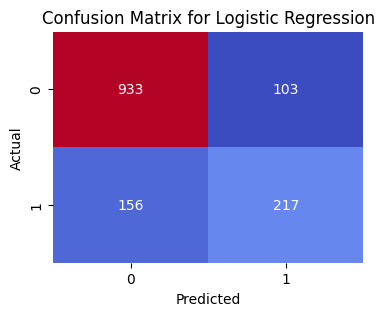

----------------------------------------
Random Forest:
  AUC: 69.2%
  Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



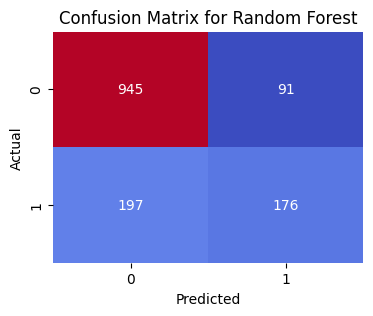

----------------------------------------
XGB:
  AUC: 70.25%
  Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.63      0.51      0.57       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



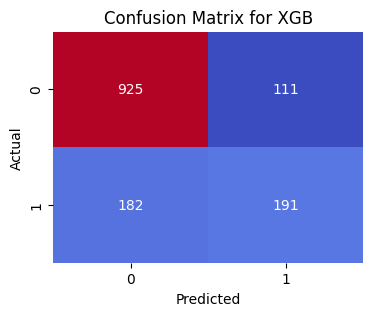

----------------------------------------
Linear SVC:
  AUC: 74.25%
  Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.70      0.57      0.63       373

    accuracy                           0.82      1409
   macro avg       0.78      0.74      0.76      1409
weighted avg       0.81      0.82      0.82      1409



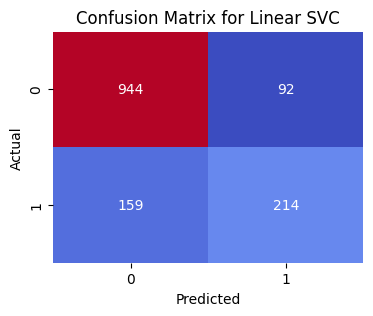

----------------------------------------


In [46]:
# Train the model using X and y
for name, clf in classifiers.items():
    model_train(clf) 

### Balancing the dataset to improve Model Performance

In [47]:
# Instatiate the smote object
sm = SMOTE(random_state = 42)

In [48]:
# Create balanced dataset of the features and target using smote object
X_sm, y_sm = sm.fit_resample (X,y)

In [49]:
# Define a function to plot the target column 
def target_plot(df, col='Churn'):
    
    """
    This function takes a dataframe and a specified column (already preset to 'Churn'), and plots the distribution of the 
    column with percentages.

    """
        
    # Calculate percentages
    total = len(df)
    values = df[col].value_counts().values
    perc = [f'{v}({(v/total) * 100:.1f}%)' for v in values]

    # Plot target column distribution
    ax = sns.countplot(x = col, data = df)
    ax.bar_label(container = ax.containers[0], labels = perc)
    ax.set_ylabel('Frequency')

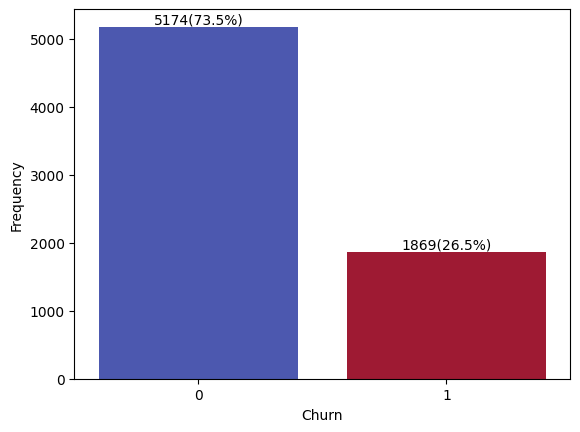

In [50]:
# Plot the target column before balancing
target_plot( df)

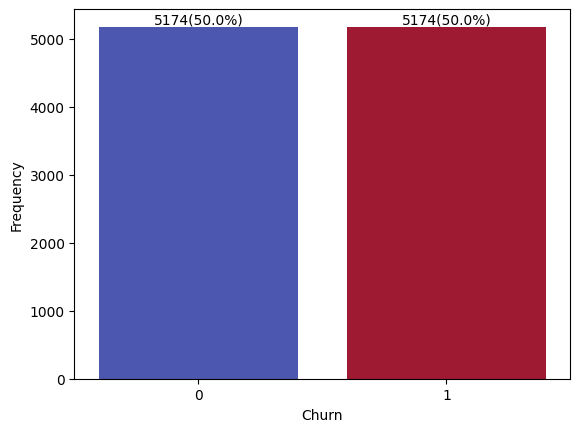

In [51]:
# Convert target column in the balanced dataset to a dataframe
y_bal_df = pd.DataFrame(y_sm, columns=['Churn'])

# Plot the target column from the balanced dataset
target_plot(y_bal_df)

Logistic Regression:
  AUC: 79.31%
  Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1021
           1       0.77      0.84      0.80      1049

    accuracy                           0.79      2070
   macro avg       0.80      0.79      0.79      2070
weighted avg       0.80      0.79      0.79      2070



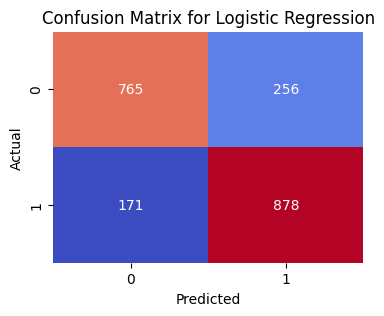

----------------------------------------
Random Forest:
  AUC: 85.94%
  Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1021
           1       0.86      0.86      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



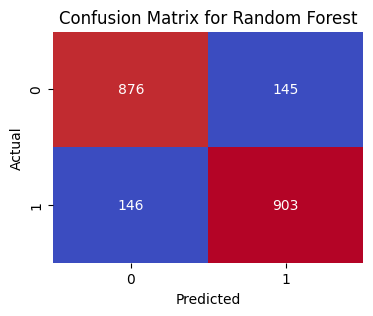

----------------------------------------
XGB:
  AUC: 85.5%
  Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1021
           1       0.86      0.86      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



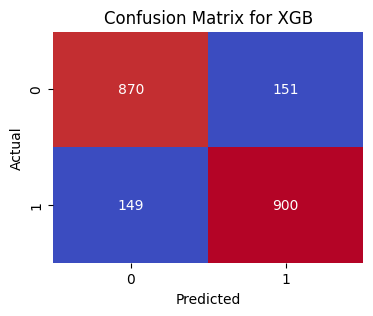

----------------------------------------
Linear SVC:
  AUC: 79.31%
  Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1021
           1       0.77      0.84      0.81      1049

    accuracy                           0.79      2070
   macro avg       0.80      0.79      0.79      2070
weighted avg       0.80      0.79      0.79      2070



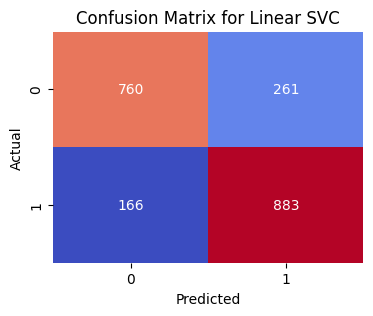

----------------------------------------


In [52]:
# Train the model using the balanced dataset 
for name, clf in classifiers.items():
    model_train(clf, X = X_sm, y = y_sm) 

### Using Feature Selection to improve Model Performance

In [60]:
# Retrieve the Random forest object
rf = classifiers['Random Forest']

# Extract feature importance
feat_imp = rf.feature_importances_

# Retrieve columns in dataset exclusing target columns
columns = df.drop("Churn", axis =1).columns

In [61]:
# Create a DataFrame for visualization
fi_df = pd.DataFrame({
    'Feature': columns,
    'Importance': feat_imp
}).sort_values(by='Importance', ascending=False)

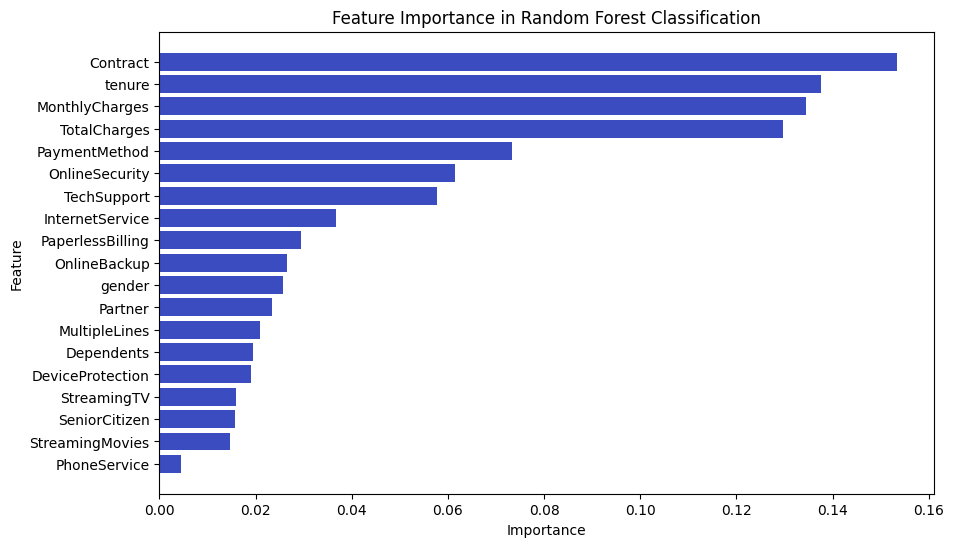

In [62]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Random Forest Classification")
plt.barh(fi_df['Feature'], fi_df['Importance'], align='center')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [68]:
# Select features with importance greater than 0.025
important_features = fi_df[fi_df['Importance'] > 0.025]['Feature']
len(important_features)

11

In [81]:
# Convert the balanced dataset to a dataframe
x_bal_df = pd.DataFrame(X_sm, columns=[col for col in columns]) 

# Create a new DataFrame with the selected features 
X_rf = x_bal_df[important_features]

# Sanity Check
len(X_rf.columns)

11

Logistic Regression:
  AUC: 78.82%
  Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1021
           1       0.77      0.84      0.80      1049

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



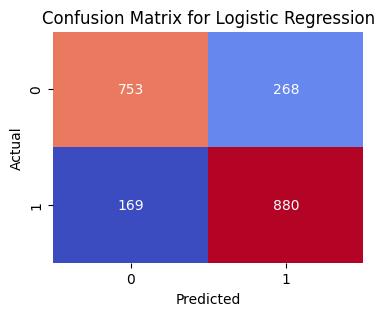

----------------------------------------
Random Forest:
  AUC: 84.26%
  Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1021
           1       0.85      0.84      0.84      1049

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



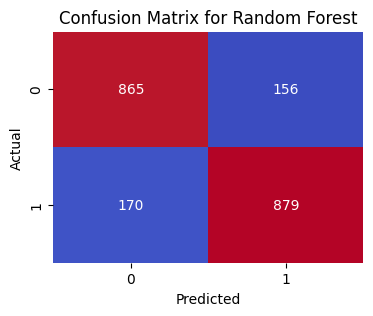

----------------------------------------
XGB:
  AUC: 84.38%
  Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1021
           1       0.84      0.86      0.85      1049

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



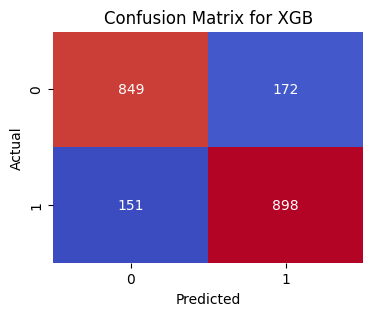

----------------------------------------
Linear SVC:
  AUC: 78.67%
  Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77      1021
           1       0.76      0.84      0.80      1049

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



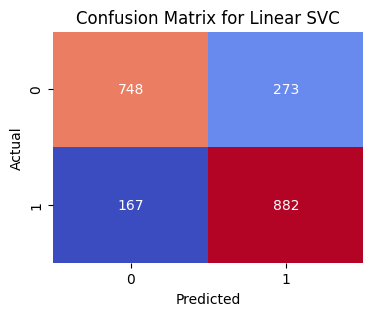

----------------------------------------


In [76]:
# Train the model using the dataset of selected features
for name, clf in classifiers.items():
    model_train(clf, X = X_rf, y = y_sm) 

### Using Hyperparameter Tuning to improve Model Performance

In [84]:
# Define the hyperparameters grid to search in random forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [None, 10, 20]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Split balanced dataset into train and test sets
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.20, random_state = 42)

# Fit the grid search to the data
grid_search.fit(X_train_sm, y_train_sm)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# # Evaluate the model with the best parameters on the test set
# best_rf = grid_search.best_estimator_
# y_pred = best_rf.predict(X_test_sm)
# print("Classification report for the best model:\n", classification_report(y_test_sm, y_pred))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
Best cross-validation score:  0.8445284908590769


Random_Forest:
  AUC: 86.08%
  Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1021
           1       0.86      0.87      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



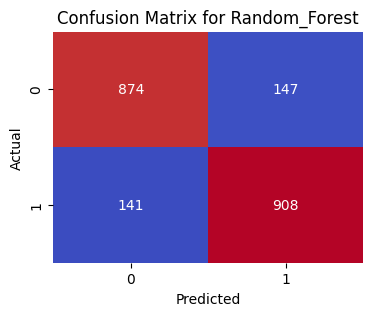

----------------------------------------


In [85]:
# Creating a dict of classifiers for Random forest with the best parameters
improved_classifier = {'Random_Forest': RandomForestClassifier(random_state= 42, n_estimators = 200, max_features = 'sqrt', max_depth = None)}

# Train the improved model using the balanced dataset 
for name, clf in improved_classifier.items():
    model_train(clf, X = X_sm, y = y_sm) 

## Result Discussion

In this analysis, several classification models were employed to predict customer churn, including Logistic Regression, Random Forest classifier, XGBoost Classifier, and Linear Support Vector Classifier. These models were evaluated using metrics such as accuracy, precision, recall, and f1-score from the classification report, as well as the AUC (Area Under the Curve) and confusion matrix, to determine their performance.

Among these models, the Linear SVC demonstrated the highest performance across all metrics, recording an accuracy of 82%, a weighted average precision and recall of 81% and 82% and AUC score of 74.25%. The weighted average gives more importance to class 0 which represents customers that did not churn. We can see that the model is biased towards the majority class as it performs better in predicting class 0 which has more samples in the dataset. 

However, in line with the project objective we more interested in identifying customers that are likely to churn in order to implement retention strategies, as such we need to improve the precision and recall scores for class 1.

To address the class imbalance issues, I applied the SMOTE (Synthetic Minority Over-sampling Technique) to the dataset, creating balanced samples of 5174 customers per class. These adjustments led to notable improvements in the performance of the 4 models. The Random Forest Classifier had the best performance recorindg 86% across all metrics. By addressing class imbalance, the model's performance on the minority class improved significantly. Metrics such as precision and recall for the minority class were enhanced from 66% and 47% to 86% respectively, making it the most effective model for predicting customer churn in this case.

Having identified the Random Forest Classifier as the best performing model, I leveraged its inherent ability to rank feature importance in predicting the target label. I selected the top features with importance score greater than 0.025 to retrain the 4 classification models. However, the models' performances declined, with the Random Forest Classifier recording 84% across all metrics. This indicates that even though the selected features were indeed more important in predicting customer churn, the model still relied on the excluded features in its learning process. 

Additionally, hyperparameter tuning of the Random Forest Classifier parameters was done in an attempt to optimise the Random Forest classifier. I created a dictionary of possible suitable values for the number of trees (n_estimators), the maximum depth of the trees (max_depth), and the minimum number of samples required to split a node (min_samples_split). Then I used the GridsearchCV method to work through different combinations of the hyperparameter values, cross-validating each combination to determine which set provides the best performance. Then I used this set of hyperparameter values to retrain the  Random Forest Classifier. This slightly improved the model recall for the customer churned class from 86% to 87% and the AUC from 85.94% to 86.08%.

The improved Random Forest Classifier with a recall of 87% was able to successfully capture 87% of the customers that churned, with a precision of 86% of its positive predictions and an AUC of 86.08%, indicating its improved ability to distinguish between the positive and negative classes. The confusion matrix shows that the model correctly predicted 908 customer as True positives, correctly identifying a significant proportion of the churned customers while minimising the false negatives to 141 customers. 
